In [1]:
!pip install music21

In [2]:
!pip install pretty_midi

In [3]:
!pip install midi2audio

In [4]:
import numpy as np
import pandas as pd
import os
import music21
from music21 import *
import IPython
from IPython.display import Image, Audio
from midi2audio import FluidSynth
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv(r"C:\Users\zayed\Documents\DSC\dataset\commu_meta.csv")
filepath=r"C:\Users\zayed\Documents\DSC\dataset\commu_midi\commu_midi\train\raw"
midis= []
for i in os.listdir(filepath):
    if i.endswith(".mid"):
        midis.append(midi)

In [6]:
i=midis[0]
print(i)

<module 'music21.midi' from 'C:\\Users\\zayed\\anaconda3\\lib\\site-packages\\music21\\midi\\__init__.py'>


In [21]:
df.head(10)

,audio_key,chord_progressions,pitch_range,num_measures,bpm,genre,track_role,inst,sample_rhythm,time_signature,min_velocity,max_velocity,split_data,id
0,aminor,"[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",mid,8,120,cinematic,main_melody,string_ensemble,standard,4/4,101,102,train,commu00001
1,cmajor,"[['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'Dm'...",mid_low,8,80,newage,accompaniment,acoustic_piano,standard,4/4,23,30,train,commu00002
2,aminor,"[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",mid_high,8,150,cinematic,riff,string_violin,standard,4/4,123,127,train,commu00003
3,cmajor,"[['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'Gm'...",mid,8,110,cinematic,pad,choir,standard,4/4,45,46,train,commu00004
4,aminor,"[['Am', 'Am', 'Am', 'Am', 'Em', 'Em', 'Em', 'E...",mid_low,4,60,cinematic,pad,acoustic_piano,standard,4/4,21,22,train,commu00005
5,aminor,"[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",mid_high,8,120,cinematic,riff,string_ensemble,standard,4/4,121,122,train,commu00006
6,aminor,"[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",mid_low,8,110,cinematic,accompaniment,string_ensemble,standard,4/4,87,96,train,commu00007
7,cmajor,"[['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'Dm'...",mid,4,120,cinematic,sub_melody,brass_ensemble,standard,4/4,68,92,train,commu00008
8,cmajor,"[['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'Dm'...",mid_high,8,120,cinematic,riff,string_violin,standard,4/4,117,126,train,commu00009
9,aminor,"[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",mid_low,8,150,cinematic,accompaniment,string_ensemble,standard,4/4,113,122,train,commu00010


In [8]:
df=df.drop(df.columns[[0]],axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11144 entries, 0 to 11143
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   audio_key           11144 non-null  object
 1   chord_progressions  11144 non-null  object
 2   pitch_range         11144 non-null  object
 3   num_measures        11144 non-null  int64 
 4   bpm                 11144 non-null  int64 
 5   genre               11144 non-null  object
 6   track_role          11144 non-null  object
 7   inst                11144 non-null  object
 8   sample_rhythm       11144 non-null  object
 9   time_signature      11144 non-null  object
 10  min_velocity        11144 non-null  int64 
 11  max_velocity        11144 non-null  int64 
 12  split_data          11144 non-null  object
 13  id                  11144 non-null  object
dtypes: int64(4), object(10)
memory usage: 1.2+ MB


In [10]:
for col in df:
    print(col," ",df[col].nunique())

audio_key   2
chord_progressions   292
pitch_range   7
num_measures   6
bpm   22
genre   2
track_role   6
inst   130
sample_rhythm   2
time_signature   3
min_velocity   124
max_velocity   116
split_data   2
id   11144


In [11]:
df.corr()

,num_measures,bpm,min_velocity,max_velocity
num_measures,1.000000,0.559589,0.126942,0.226859
bpm,0.559589,1.000000,0.448413,0.474995
min_velocity,0.126942,0.448413,1.000000,0.884694
max_velocity,0.226859,0.474995,0.884694,1.000000


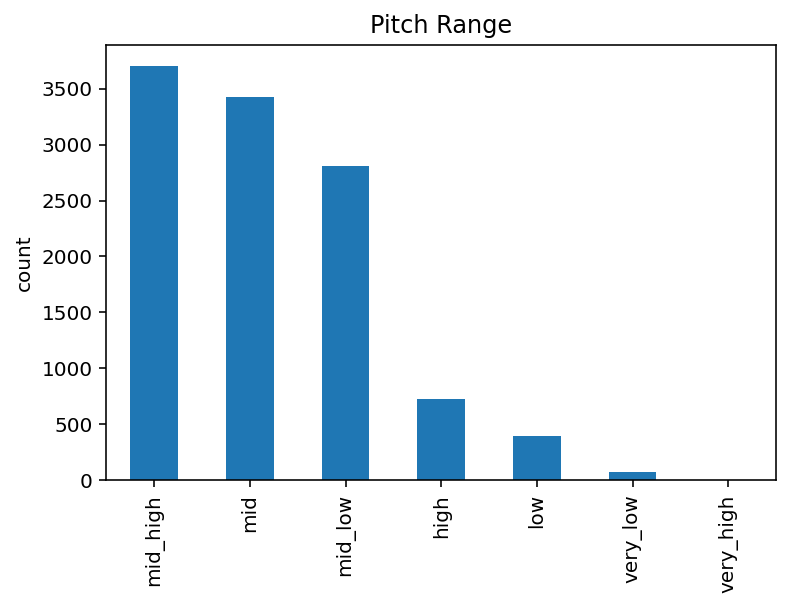

In [12]:
df['pitch_range'].value_counts().plot.bar()
plt.title("Pitch Range")
plt.ylabel("count")
plt.show()

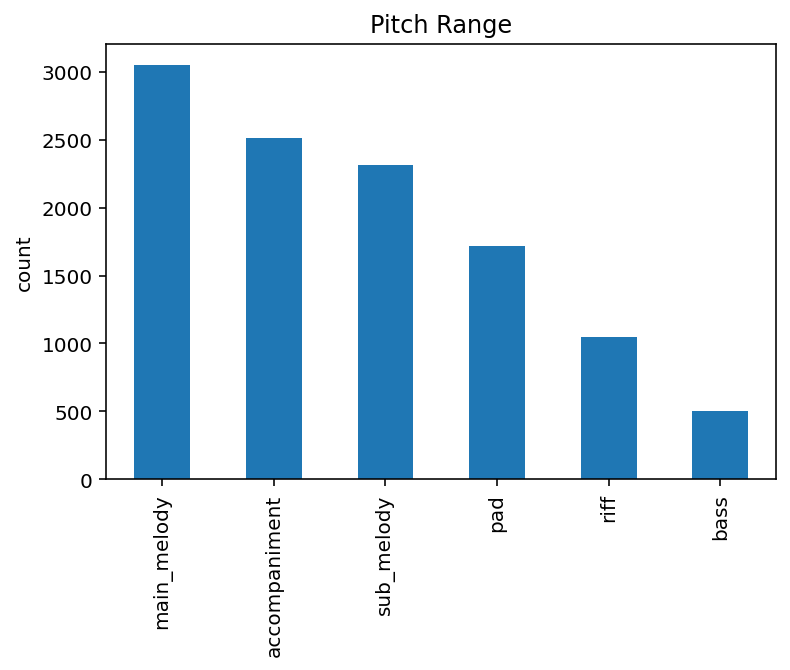

In [13]:
df['track_role'].value_counts().plot.bar()
plt.title("Pitch Range")
plt.ylabel("count")
plt.show()

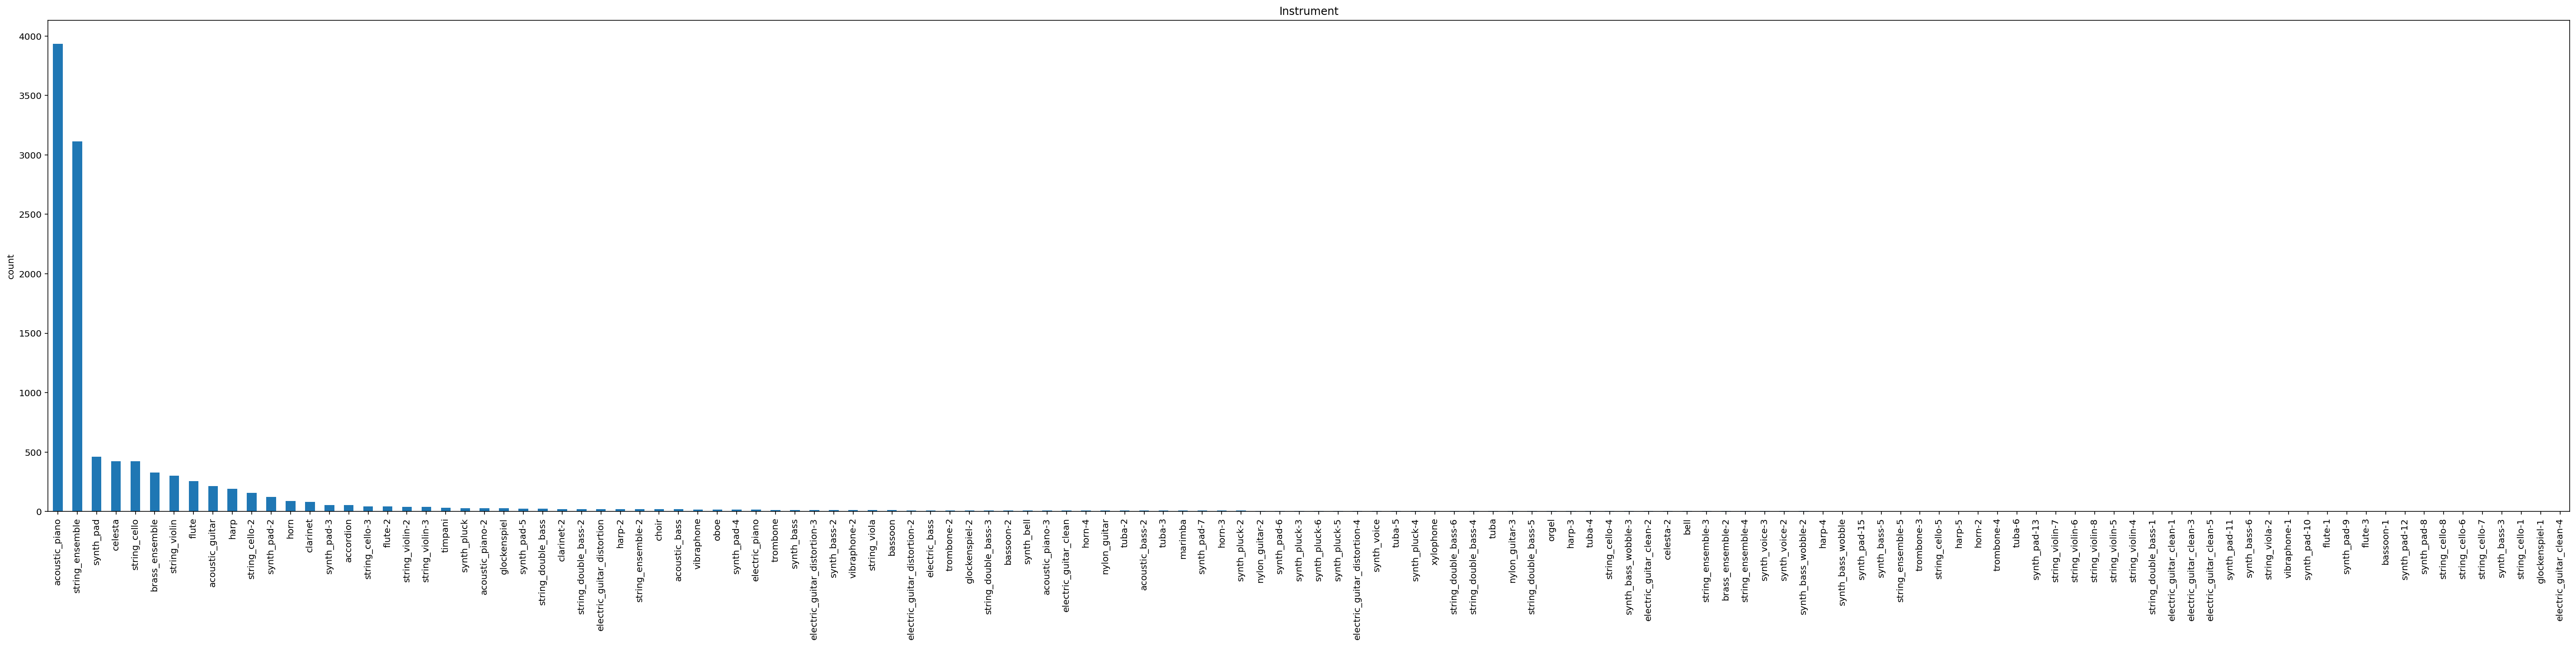

In [14]:
plt.figure(figsize=(50, 10))
df['inst'].value_counts().plot.bar()
plt.title("Instrument")
plt.ylabel("count")
plt.show()

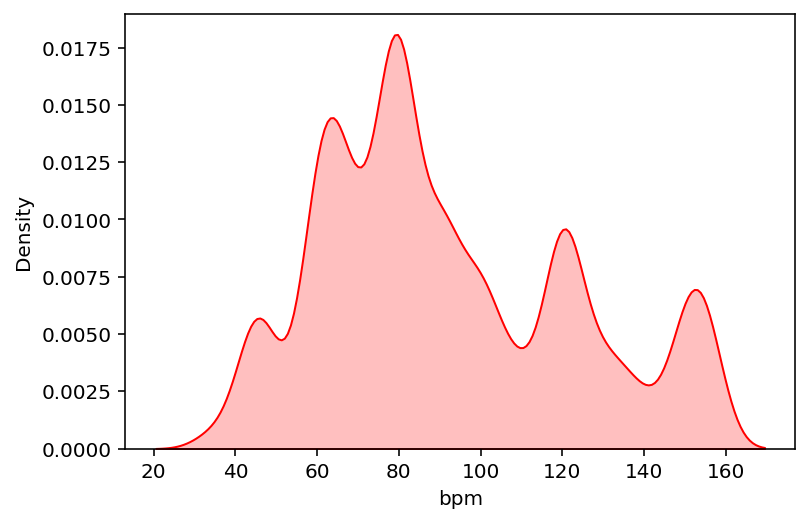

In [22]:
sns.kdeplot(df['bpm'],color='red',shade=True)
plt.show()

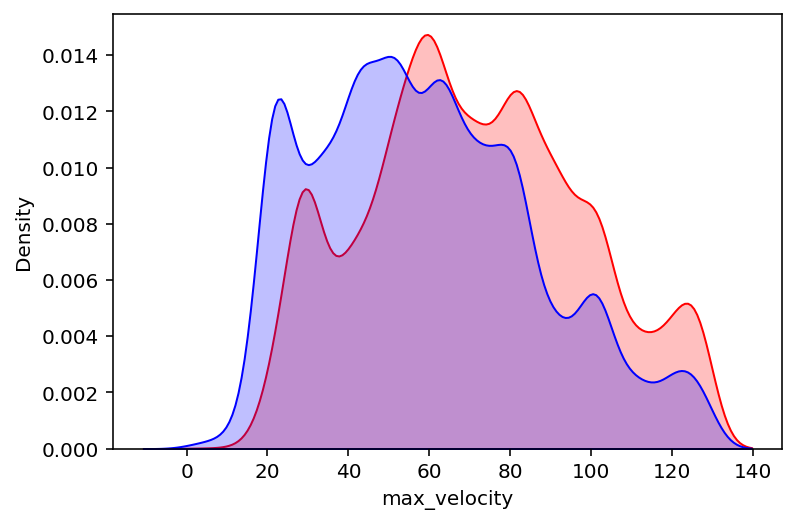

In [15]:
sns.kdeplot(df['max_velocity'],color='red',shade=True)
sns.kdeplot(df['min_velocity'],color='blue',shade=True)
plt.show()

In [16]:
inst=df['inst'].unique()

In [17]:
inst

array(['string_ensemble', 'acoustic_piano', 'string_violin', 'choir',
       'brass_ensemble', 'acoustic_piano-2', 'celesta', 'bassoon-2',
       'flute', 'string_cello', 'harp', 'string_viola', 'clarinet',
       'horn', 'electric_piano', 'string_violin-2', 'celesta-2',
       'clarinet-2', 'bassoon-1', 'bassoon', 'synth_pad', 'synth_pluck',
       'synth_voice-2', 'synth_bass_wobble-2', 'glockenspiel',
       'synth_bass-2', 'synth_voice', 'synth_bass_wobble-3', 'tuba-2',
       'electric_guitar_distortion-3', 'synth_bass', 'synth_pluck-2',
       'tuba-3', 'synth_pad-4', 'synth_bass-3',
       'electric_guitar_distortion', 'electric_guitar_distortion-2',
       'synth_pad-3', 'synth_bass_wobble', 'string_ensemble-2',
       'synth_pluck-3', 'synth_pad-2', 'tuba', 'harp-3', 'synth_pluck-4',
       'timpani', 'acoustic_guitar', 'trombone-4', 'tuba-6',
       'synth_voice-3', 'tuba-5', 'string_double_bass',
       'electric_guitar_distortion-4', 'synth_pad-5', 'synth_pad-7',
       'sy

In [18]:
crosstab=pd.crosstab(index=df["pitch_range"],columns=df["track_role"])
print (crosstab)

track_role   accompaniment  bass  main_melody  pad  riff  sub_melody
pitch_range                                                         
high                     2     0          310   73   142         202
low                     14   304            3   32     6          40
mid                    970     4          742  700   335         677
mid_high               116     2         1917  182   450        1035
mid_low               1405   122           75  733   118         357
very_high                0     0            1    0     0           1
very_low                 3    71            0    0     0           0


<AxesSubplot:xlabel='track_role', ylabel='pitch_range'>

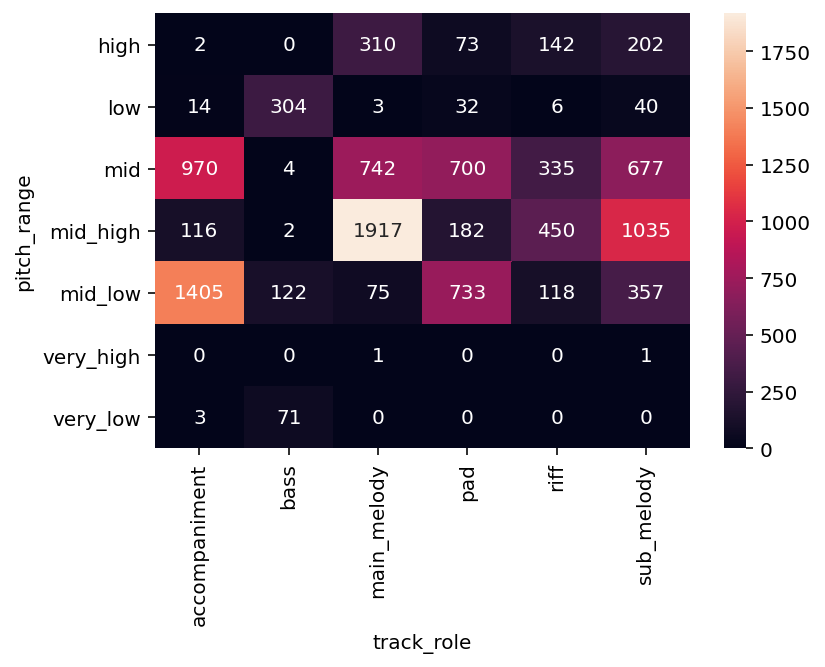

In [19]:
sns.heatmap(crosstab, annot = True,fmt='.5g')

In [20]:
crosstab=pd.crosstab(index=[])

TypeError: crosstab() missing 1 required positional argument: 'columns'